In [2]:
%pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import pandas as pd
import missingno
import sklearn 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize
import math, time, random, datetime

import catboost
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier, Pool, cv

import warnings
warnings.filterwarnings('ignore')

In [4]:
#train = pd.read_csv("/home/saumye/Documents/notebooks/Titanic kaggle/train.csv")
#test = pd.read_csv("/home/saumye/Documents/notebooks/Titanic kaggle/test.csv")
train = pd.read_csv(r"C:\Users\saumy\Documents\py\notebooks\datasets\titanic\train.csv")
test = pd.read_csv(r'C:\Users\saumy\Documents\py\notebooks\datasets\titanic\test.csv')
print(train.describe())
print(train.shape)

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  
(891, 12)


In [5]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [8]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

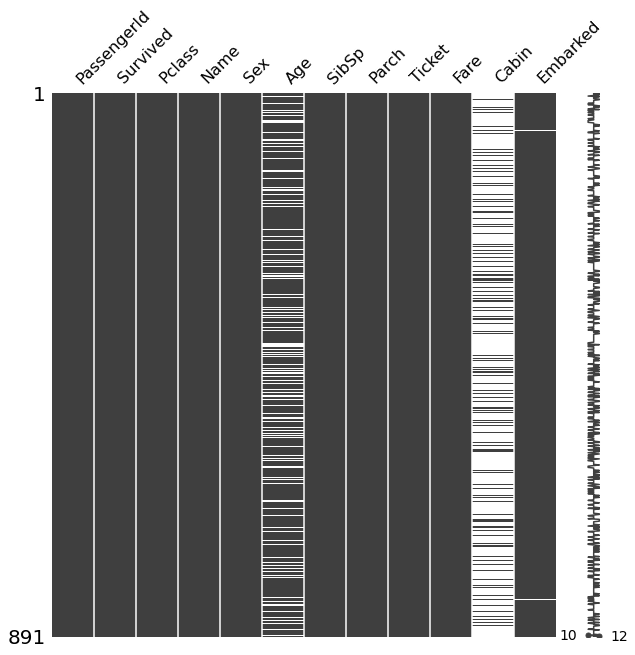

In [9]:
missingno.matrix(train, figsize=(10,10))

In [10]:
train['Age'].isnull().sum()

177

0    549
1    342
Name: Survived, dtype: int64


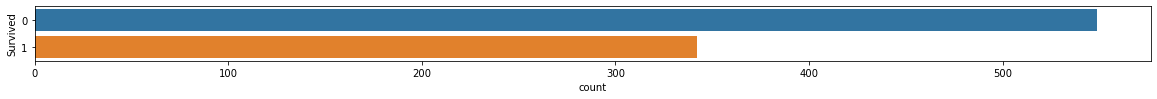

In [11]:
fig = plt.figure(figsize=(20,1))
sns.countplot(y = 'Survived', data = train)
print(train.Survived.value_counts())

In [12]:
df_bin = pd.DataFrame()
df_con = pd.DataFrame()

In [13]:
df_bin['Survived'] = train['Survived']
df_con['Survived'] = train['Survived']

In [14]:
df_bin.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [15]:
df_con.head()

,Survived
0,0
1,1
2,1
3,1
4,0


<AxesSubplot:xlabel='Pclass', ylabel='Density'>

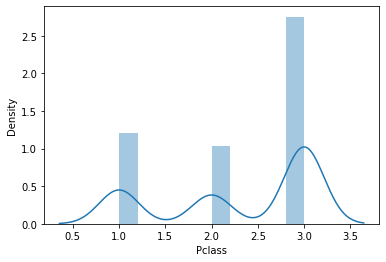

In [16]:
# Because we want to take a look at different features individually so 
# here we will consider Pclass which is passenger class which will be 
# 1, 2 and 3. 
sns.distplot(train.Pclass)

In [17]:
train.Pclass.isnull().sum()

0

In [18]:
df_bin['Pclass'] = train['Pclass']
df_con['Pclass'] = train['Pclass']

Name

In [19]:
train.Name.value_counts()

Jacobsohn, Mrs. Sidney Samuel (Amy Frances Christy)    1
Baxter, Mrs. James (Helene DeLaudeniere Chaput)        1
Roebling, Mr. Washington Augustus II                   1
Carter, Mr. William Ernest                             1
Hoyt, Mr. William Fisher                               1
                                                      ..
Bidois, Miss. Rosalie                                  1
Niskanen, Mr. Juha                                     1
Ekstrom, Mr. Johan                                     1
Abbott, Mrs. Stanton (Rosa Hunt)                       1
Carter, Master. William Thornton II                    1
Name: Name, Length: 891, dtype: int64

<AxesSubplot:xlabel='count', ylabel='Sex'>

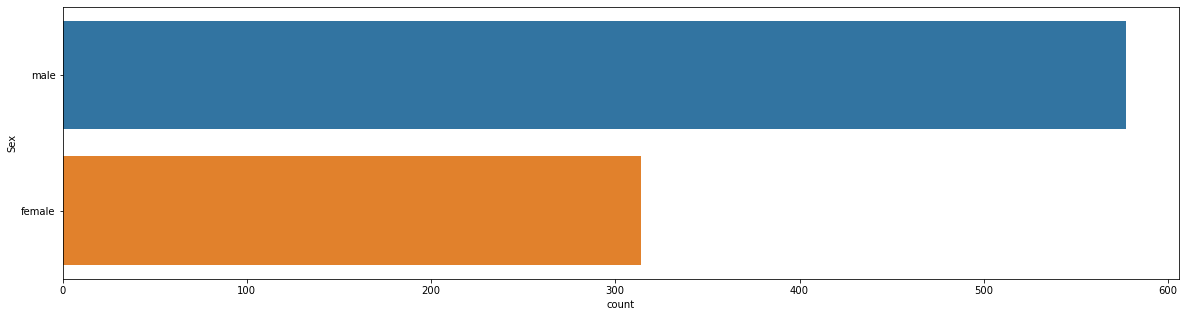

In [20]:
# Sex

plt.figure(figsize = (20, 5))
sns.countplot(y = "Sex", data = train)

In [21]:
train.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [22]:
train.Sex.isnull().sum()

0

In [23]:
train.Sex.head()

0      male
1    female
2    female
3    female
4      male
Name: Sex, dtype: object

In [24]:
df_bin.head()

,Survived,Pclass
0,0,3
1,1,1
2,1,3
3,1,1
4,0,3


In [25]:
df_bin['Sex'] = train['Sex']
print(df_bin.head())
df_bin['Sex'] = np.where(df_bin['Sex'] == 'female', 1, 0)
df_con['Sex'] = train['Sex']

# replaced male and female with 1 and 0 to make it easier to read the data


   Survived  Pclass     Sex
0         0       3    male
1         1       1  female
2         1       3  female
3         1       1  female
4         0       3    male


In [26]:
df_bin.head()

,Survived,Pclass,Sex
0,0,3,0
1,1,1,1
2,1,3,1
3,1,1,1
4,0,3,0


In [27]:
# Function to create count and distribution visualisations

def plot_count_dist(data, bin_df, label_column, target_column, figsize=(20, 5), use_bin_df=False):
    """
    Function to plot counts and distributions of a label variable and 
    target variable side by side.
    ::param_data:: = target dataframe
    ::param_bin_df:: = binned dataframe for countplot
    ::param_label_column:: = binary labelled column
    ::param_target_column:: = column you want to view counts and distributions
    ::param_figsize:: = size of figure (width, height)
    ::param_use_bin_df:: = whether or not to use the bin_df, default False
    """
    if use_bin_df: 
        fig = plt.figure(figsize=figsize)
        plt.subplot(1, 2, 1)
        sns.countplot(y=target_column, data=bin_df);
        plt.subplot(1, 2, 2)
        sns.distplot(data.loc[data[label_column] == 1][target_column], 
                     kde_kws={"label": "Survived"});
        sns.distplot(data.loc[data[label_column] == 0][target_column], 
                     kde_kws={"label": "Did not survive"});
    else:
        fig = plt.figure(figsize=figsize)
        plt.subplot(1, 2, 1)
        sns.countplot(y=target_column, data=data);
        plt.subplot(1, 2, 2)
        sns.distplot(data.loc[data[label_column] == 1][target_column], 
                     kde_kws={"label": "Survived"});
        sns.distplot(data.loc[data[label_column] == 0][target_column], 
                     kde_kws={"label": "Did not survive"});

In [28]:
# Sibsp

train.SibSp.isnull().sum()

0

In [29]:
train.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [30]:
df_bin['SibSp'] = train['SibSp']
df_con['SibSp'] = train['SibSp']

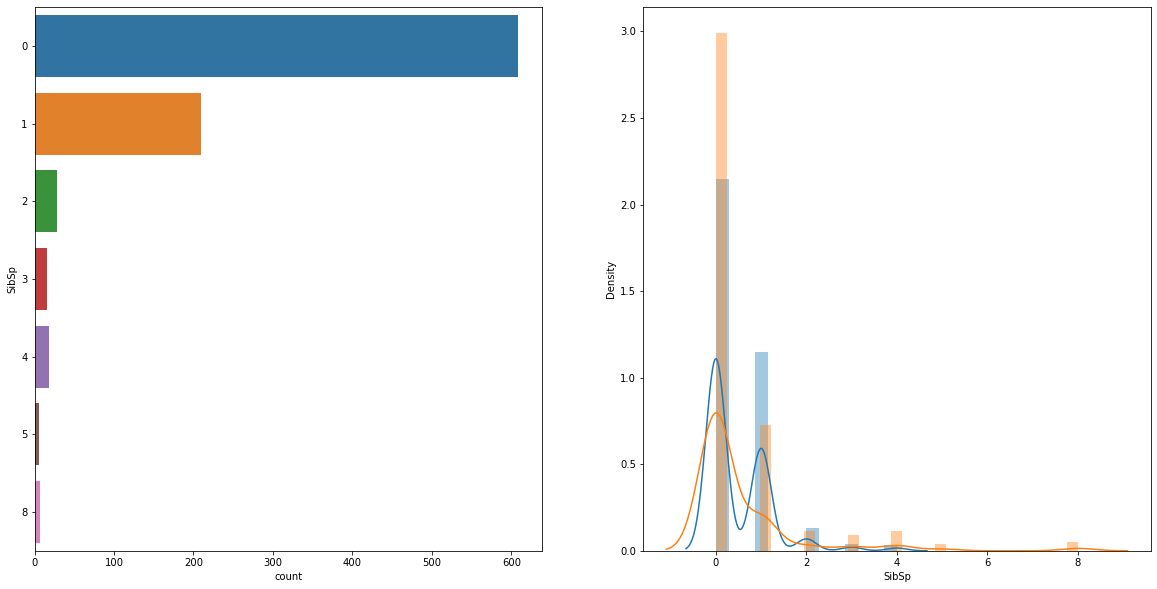

In [31]:
plot_count_dist(train,
                bin_df = df_bin,
                label_column='Survived',
                target_column='SibSp',
                figsize=(20,10))

In [32]:
# Ticket

train.Ticket.isnull().sum()

0

<AxesSubplot:xlabel='count', ylabel='Ticket'>

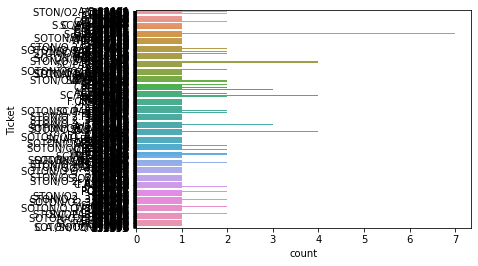

In [33]:
sns.countplot(y='Ticket', data=train)

In [34]:
len(train.Ticket.value_counts())

681

In [35]:
train.Ticket.value_counts()

1601        7
CA. 2343    7
347082      7
347088      6
3101295     6
           ..
2677        1
347470      1
312992      1
PC 17318    1
36865       1
Name: Ticket, Length: 681, dtype: int64

In [36]:
# Fare

train.Fare.isnull().sum()

0

<AxesSubplot:xlabel='count', ylabel='Fare'>

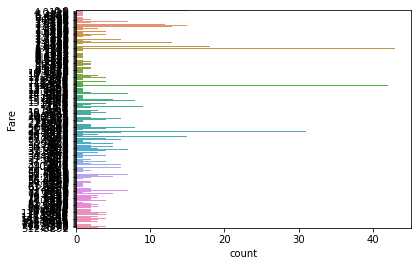

In [37]:
sns.countplot(y='Fare', data=train)

In [38]:
train.Fare.dtype

dtype('float64')

In [39]:
print("Number of unique fare values are : {}".format(len(train.Fare.unique())))

Number of unique fare values are : 248


In [40]:
df_con.head()

,Survived,Pclass,Sex,SibSp
0,0,3,male,1
1,1,1,female,1
2,1,3,female,0
3,1,1,female,1
4,0,3,male,0


In [41]:
df_con['Fare'] = train['Fare']
df_bin['Fare'] = pd.cut(train['Fare'], bins=5) 

In [42]:
df_con.head()

,Survived,Pclass,Sex,SibSp,Fare
0,0,3,male,1,7.2500
1,1,1,female,1,71.2833
2,1,3,female,0,7.9250
3,1,1,female,1,53.1000
4,0,3,male,0,8.0500


In [43]:
df_bin.head()

,Survived,Pclass,Sex,SibSp,Fare
0,0,3,0,1,"(-0.512, 102.466]"
1,1,1,1,1,"(-0.512, 102.466]"
2,1,3,1,0,"(-0.512, 102.466]"
3,1,1,1,1,"(-0.512, 102.466]"
4,0,3,0,0,"(-0.512, 102.466]"


In [44]:
df_bin.Fare.value_counts()

(-0.512, 102.466]     838
(102.466, 204.932]     33
(204.932, 307.398]     17
(409.863, 512.329]      3
(307.398, 409.863]      0
Name: Fare, dtype: int64

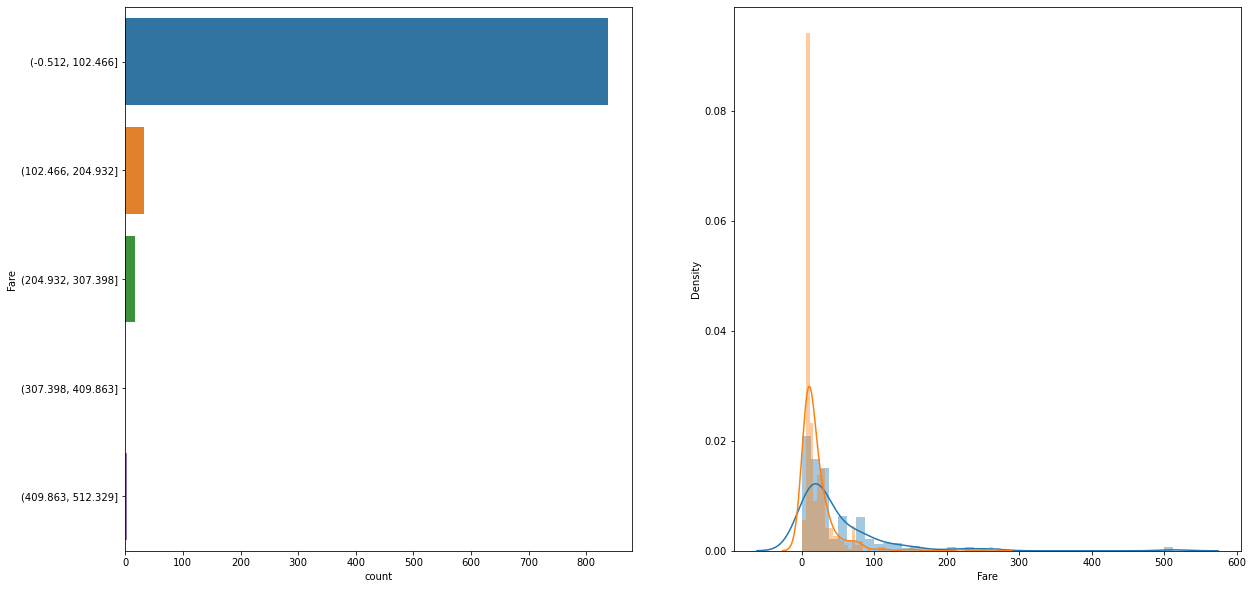

In [45]:
# Visualise the Fare bin counts as well as the Fare distribution versus Survived.
plot_count_dist(data=train,
                bin_df=df_bin,
                label_column='Survived', 
                target_column='Fare', 
                figsize=(20,10), 
                use_bin_df=True)

In [46]:
# Cabin

train.Cabin.isnull().sum()

687

In [47]:
train.shape

(891, 12)

In [48]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [49]:
train.Cabin.value_counts()

B96 B98        4
C23 C25 C27    4
G6             4
E101           3
D              3
              ..
C91            1
D6             1
D37            1
D15            1
B82 B84        1
Name: Cabin, Length: 147, dtype: int64

In [50]:
# Embarked
# The port where the passenger boarded the Titanic.
# Key: C = Cherbourg, Q = Queenstown, S = Southampton

train.Embarked.isnull().sum()

2

In [51]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [52]:
train.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

<AxesSubplot:xlabel='count', ylabel='Embarked'>

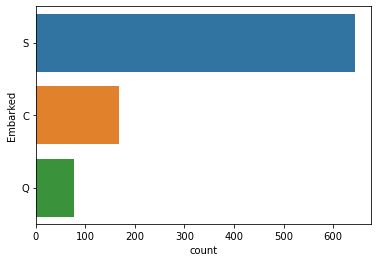

In [53]:
sns.countplot(y='Embarked', data=train)

In [54]:
df_bin['Embarked'] = train['Embarked']
df_con['Embarked'] = train['Embarked']

In [55]:
print(len(df_con))
print(len(df_bin))

891
891


In [56]:
df_con.dropna(subset=['Embarked'], inplace=True)
df_bin.dropna(subset=['Embarked'], inplace=True)

In [57]:
len(df_con)

889

Feature Encoding

In [58]:
one_hot_cols = df_bin.columns.tolist()
one_hot_cols.remove('Survived')
df_bin_enc = pd.get_dummies(df_bin, columns=one_hot_cols)

In [59]:
df_bin_enc.head()

,Survived,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1,SibSp_0,SibSp_1,SibSp_2,SibSp_3,...,SibSp_5,SibSp_8,"Fare_(-0.512, 102.466]","Fare_(102.466, 204.932]","Fare_(204.932, 307.398]","Fare_(307.398, 409.863]","Fare_(409.863, 512.329]",Embarked_C,Embarked_Q,Embarked_S
0,0,0,0,1,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1,1,1,0,0,0,1,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
2,1,0,0,1,0,1,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,1,1,0,0,0,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
4,0,0,0,1,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [60]:
df_con.head(10)

,Survived,Pclass,Sex,SibSp,Fare,Embarked
0,0,3,male,1,7.2500,S
1,1,1,female,1,71.2833,C
2,1,3,female,0,7.9250,S
3,1,1,female,1,53.1000,S
4,0,3,male,0,8.0500,S
5,0,3,male,0,8.4583,Q
6,0,1,male,0,51.8625,S
7,0,3,male,3,21.0750,S
8,1,3,female,0,11.1333,S
9,1,2,female,1,30.0708,C


In [61]:
# one hot encode the categorical columns
df_embarked_one_hot = pd.get_dummies(df_con['Embarked'], prefix='embarked')
df_sex_one_hot = pd.get_dummies(df_con['Sex'], prefix='sex')
df_pclass_one_hot = pd.get_dummies(df_con['Pclass'], prefix='pclass')

In [62]:
df_con.head()

,Survived,Pclass,Sex,SibSp,Fare,Embarked
0,0,3,male,1,7.2500,S
1,1,1,female,1,71.2833,C
2,1,3,female,0,7.9250,S
3,1,1,female,1,53.1000,S
4,0,3,male,0,8.0500,S


In [63]:
# combine the one hot encoded columns with df_con_enc
df_con_enc = pd.concat([df_con,
                        df_embarked_one_hot,
                        df_sex_one_hot,
                        df_pclass_one_hot], axis=1)

# drop the original categorical columns (because now they have been one hot encoded)
df_con_enc = df_con_enc.drop(['Pclass', 'Sex', 'Embarked'], axis=1)

In [64]:
df_con.head()

,Survived,Pclass,Sex,SibSp,Fare,Embarked
0,0,3,male,1,7.2500,S
1,1,1,female,1,71.2833,C
2,1,3,female,0,7.9250,S
3,1,1,female,1,53.1000,S
4,0,3,male,0,8.0500,S


In [65]:
df_con_enc.head(20)

,Survived,SibSp,Fare,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,0,1,7.2500,0,0,1,0,1,0,0,1
1,1,1,71.2833,1,0,0,1,0,1,0,0
2,1,0,7.9250,0,0,1,1,0,0,0,1
3,1,1,53.1000,0,0,1,1,0,1,0,0
4,0,0,8.0500,0,0,1,0,1,0,0,1
5,0,0,8.4583,0,1,0,0,1,0,0,1
6,0,0,51.8625,0,0,1,0,1,1,0,0
7,0,3,21.0750,0,0,1,0,1,0,0,1
8,1,0,11.1333,0,0,1,1,0,0,0,1
9,1,1,30.0708,1,0,0,1,0,0,1,0


In [66]:
df_bin_enc.head()

,Survived,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1,SibSp_0,SibSp_1,SibSp_2,SibSp_3,...,SibSp_5,SibSp_8,"Fare_(-0.512, 102.466]","Fare_(102.466, 204.932]","Fare_(204.932, 307.398]","Fare_(307.398, 409.863]","Fare_(409.863, 512.329]",Embarked_C,Embarked_Q,Embarked_S
0,0,0,0,1,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1,1,1,0,0,0,1,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
2,1,0,0,1,0,1,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,1,1,0,0,0,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
4,0,0,0,1,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [67]:
# select the dataframe we want to use for predictions
selected_df = df_con_enc

In [68]:
selected_df.head()

,Survived,SibSp,Fare,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,0,1,7.2500,0,0,1,0,1,0,0,1
1,1,1,71.2833,1,0,0,1,0,1,0,0
2,1,0,7.9250,0,0,1,1,0,0,0,1
3,1,1,53.1000,0,0,1,1,0,1,0,0
4,0,0,8.0500,0,0,1,0,1,0,0,1


In [69]:
x_train = selected_df.drop('Survived', axis=1) # data
y_train = selected_df.Survived # labels

In [70]:
x_train.head()

,SibSp,Fare,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,1,7.2500,0,0,1,0,1,0,0,1
1,1,71.2833,1,0,0,1,0,1,0,0
2,0,7.9250,0,0,1,1,0,0,0,1
3,1,53.1000,0,0,1,1,0,1,0,0
4,0,8.0500,0,0,1,0,1,0,0,1


In [71]:
y_train

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64

In [72]:
print(x_train.shape)
print(y_train.shape)

(889, 10)
(889,)


In [73]:
def fit_ml_algo(algo, X_train, Y_train, cv):
    # One pass 
    model = algo.fit(X_train, Y_train)
    acc = round(model.score(X_train, Y_train) * 100, 2)
    
    # cross validation
    train_pred = model_selection.cross_val_predict(algo, X_train, Y_train, cv = cv, n_jobs = -1)

    #cross-validation accuracy metric 
    acc_cv = round(metrics.accuracy_score(y_train, train_pred) * 100, 2)

    return train_pred, acc, acc_cv

LOGISTIC REGRESSION

In [74]:
start_time = time.time()

train_pred_log, acc_log, acc_cv_log = fit_ml_algo(LogisticRegression(), x_train, y_train, 10)

log_time = (time.time() - start_time)

print("Accuracy: %s" % acc_log)
print("Accuracy CV 10-Fold: %s" % acc_cv_log)
print("Running Time: %s" % datetime.tidmedelta(seconds=log_time))


TerminatedWorkerError: A worker process managed by the executor was unexpectedly terminated. This could be caused by a segmentation fault while calling the function or by an excessive memory usage causing the Operating System to kill the worker.
